In [3]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
# %matplotlib inline

In [4]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])

In [8]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2)

Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6411 - accuracy: 0.8371 - val_loss: 0.3595 - val_accuracy: 0.9001
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3363 - accuracy: 0.9055 - val_loss: 0.2914 - val_accuracy: 0.9202


In [9]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2914 - accuracy: 0.9202
Loss=0.291
Accuracy=0.920


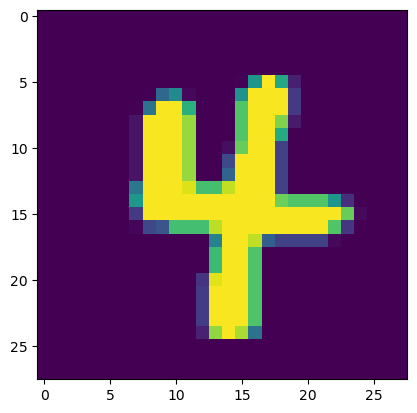

In [10]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

313/313 [==============================] - 1s 4ms/step


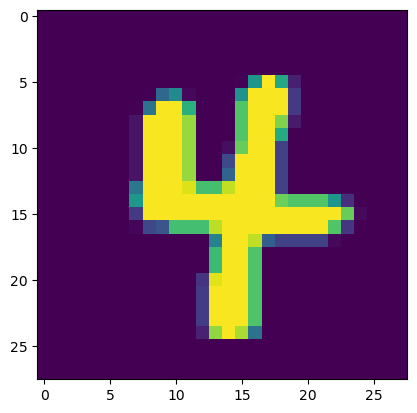

[1.7572085e-06 4.2996203e-06 1.9656572e-05 9.8500466e-05 9.7866940e-01
 1.1128106e-03 1.7171595e-04 1.4808552e-03 1.4045582e-03 1.7036505e-02]


In [11]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print(predicted_value[n])

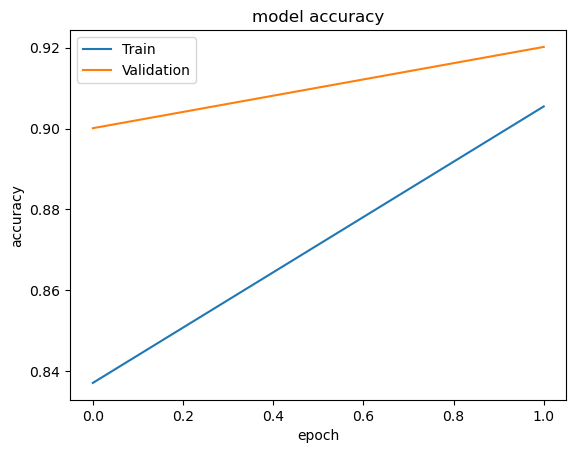

In [17]:
# history.history()
history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

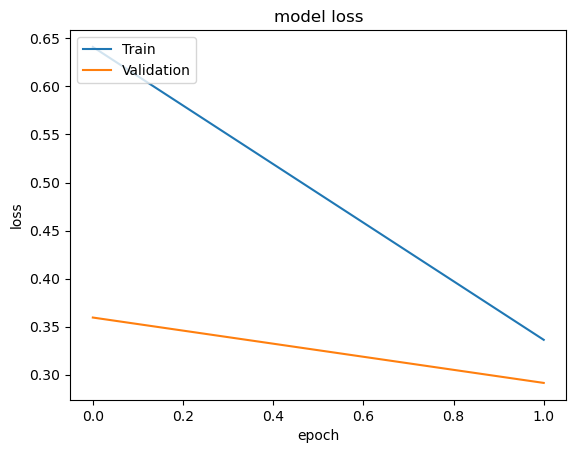

In [18]:
# history.history()
history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()